텐서

In [ ]:
import numpy as np
import tensorflow as tf

0D Tensor

In [ ]:
t0 = tf.constant(1)
print(t0)

tf.Tensor(1, shape=(), dtype=int32)


1D Tensor(Vector)

In [ ]:
t1 = tf.constant([1,2,3]) #하나의 축으로 연달아 있음
print(t1)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


2D Tensor(Matrix)

In [ ]:
t2 = tf.constant([[1,2,3],[4,5,6]]) # shape 2행 3열을 나타냄
print(t2)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


3D Tensor (시계열 데이터)
features,timsteps,samples

In [ ]:
t3= tf.constant([[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]])
print(t3)


tf.Tensor(
[[[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]

 [[1 2 3]
  [4 5 6]
  [7 8 9]]], shape=(3, 3, 3), dtype=int32)


4D Tensor (4개의 축) 
# 주로 샘플, 높이,너비,컬러 채널을 가진 구조로 사용

In [ ]:
t4 = tf.constant([[[[1,2],[3,4],[1,2],[3,4],[1,2],[3,4],[1,2],[3,4]]]])
print(t4)

tf.Tensor(
[[[[1 2]
   [3 4]
   [1 2]
   [3 4]
   [1 2]
   [3 4]
   [1 2]
   [3 4]]]], shape=(1, 1, 8, 2), dtype=int32)


#텐서 데이터 타입
정수형 텐서:int32

실수형 텐서:float32

문자열 텐서:string

연산시 텐서의 타입 일치 필요

타입변환에는 tf.cast()


In [ ]:
i = tf.constant(2)
print(i)

tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
f = tf.constant(2.)
print(f)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
s = tf.constant('hi')
print(s)

tf.Tensor(b'hi', shape=(), dtype=string)


In [ ]:
f16 = tf.constant(2., dtype=tf.float16)  # -> 32비트 float 타입을 16비트로 변환하고 dtype을 tf.float16 16비트로 변환시킴
print(f16)

tf.Tensor(2.0, shape=(), dtype=float16)


In [ ]:
i8 = tf.constant(2, dtype=tf.int8)
print(i8)

tf.Tensor(2, shape=(), dtype=int8)


In [ ]:
f32 = tf.cast(f16, tf.float32) #16비트였던 f16을 32로 cast(변화)함
print(f32)

tf.Tensor(2.0, shape=(), dtype=float32)


#텐서 연산

In [ ]:
a = tf.constant(2)
b = tf.constant(5)

print(tf.add(a,b)) #더하기 연산자
print(tf.subtract(a,b)) #빼기 연산자

tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(-3, shape=(), dtype=int32)


In [ ]:
a = tf.constant(2)
b = tf.constant(5)

print(tf.add(a,b)) #더하기 연산자
print(tf.subtract(a,b)) #빼기 연산자
print(tf.multiply(a,b)) #곱하기 연산자
print(tf.divide(a,b)) #나눗셈 연산자

tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(-3, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(0.4, shape=(), dtype=float64)


In [ ]:
print(tf.cast(tf.constant(2),tf.float32)+ tf.constant(2.2)) #tensor에서는 int형+float형을 cast 직접 해줘야 함

tf.Tensor(4.2, shape=(), dtype=float32)


# 딥러닝 구조 및 학습

모델을 구성하는 레이어

입력 데이터와 그에 대한 목적

학습시에 사용할 피드백을 정의하는 손실함수

학습 진행 방식을 결정하는 옵티마이저

#레이어
1.신경망의 핵심 데이터 구조

2.하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈

3.상태가 없는 레이어도 있지만, 대부분 가중치(Weight)라는 레이어 상태를 가진다.

4.가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

    keras에서 사용하는 주요 레이어
    1.Dense
    2.Activation
    3.Flatten
    4.Input

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import Activation,Flatten,Input

#Dense
완전 연결 계층 (모든 노드가 서로 연결 된 상태)

노드수(유닛수), 활성화 함수(activation)등 지정

name을 통한 레이어간 구분 가능

★가중치 초기화(kernel_intializer)

In [ ]:
Dense(10, activation='softmax') #softmax는 activation종류중 하나지만 가장 끝 값을 가져오는걸 의미

In [ ]:
Dense(10, activation='relu', name = 'relu')

In [ ]:
Dense(10, kernel_initializer = 'he_normal', name = 'Dense Layer')

Keras에서 제공하는 활성화 함수(Activation function) 종류는 : https://keras.io/ko/activations/

Dense layer에서 미리 activation 지정 할 수도 있지만 필요에 따라 별도로 레이어를 만들 수도 있다.


In [ ]:
dense = Dense(10, activation='relu',name='Dense Layer')
Activation(dense)

#Flatten

배치 크기(or 데이터 크기)를 제외하고 데이터를 1차원으로 펼치는 작업

Ex) (128, 3, 2, 2) -> (128,12)

In [ ]:
Flatten(input_shape=(128,3,2,2))

#Input
1.모델의 입력을 정의

2.shape, dtype을 포함

3.하나의 모델은 여러 개의 입력을 가질 수 있음

4.summary() 메소드를 통해서는 보이지 않음

In [ ]:
Input(shape=(28,28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [ ]:
Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_2')>

#모델
딥러닝 모델은 레이어로 만들어진 비순환 유향 그래프 구조-> 방향이 있는

#모델 구성
1.squential()

2.서브 클래싱 -> 클래스를 상속 받아서 할 수도 있음

3.함수형 API

#Sequential()
1.모델이 순차적인 구조로 진행할 때 사용

2.가장 간단-> 순차적

3.다중 입력 및 출력이 존재하는 등 복잡한 모델은 구성할 수 없음

In [1]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model

In [5]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


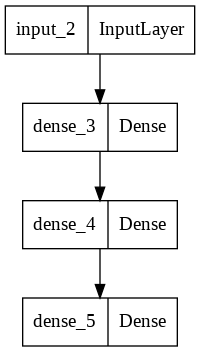

In [6]:
plot_model(model) #-> 그림으로 볼 수 있다

#함수형 API
1.가장 권장되는 방법

2.모델을 복잡하고,유연하게 구성 가능

3.다중 입출력을 다룰 수 있음

In [10]:
from tensorflow.python.framework.tensor_util import FastAppendBFloat16ArrayToTensorProto
inputs = Input(shape=(28,28,1))
x = Flatten(input_shape=(28,28,1))(inputs)
x = Dense(300, activation='relu')(x)
x = Dense(100, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


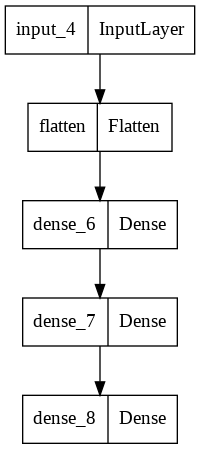

In [11]:
plot_model(model)

In [15]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100, activation='relu')(input_layer)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_layer, hidden2])
output = Dense(1)(concat)

model=Model(inputs=[input_layer], outputs=[output])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 28, 100)      2900        ['input_8[0][0]']                
                                                                                                  
 dense_16 (Dense)               (None, 28, 30)       3030        ['dense_15[0][0]']               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 28, 58)       0           ['input_8[0][0]',                
                                                                  'dense_16[0][0]']         

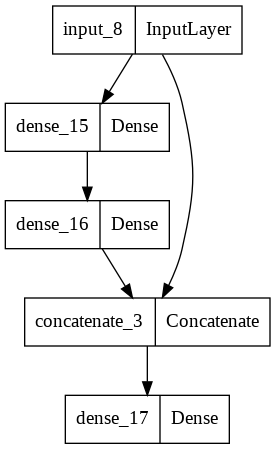

In [16]:
plot_model(model)

In [25]:
input_1 = Input(shape=(10,10),name='input_1')
input_2 = Input(shape=(10,28),name='input_2')
hidden1 = Dense(100, activation='relu')(input_2)
hidden2 = Dense(10, activation='relu')(hidden1)
concat = Concatenate()([input_1, hidden2])
output = Dense(1,activation='sigmoid', name='output')(concat)

model = Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_26 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 10, 10)       1010        ['dense_26[0][0]']               
                                                                                            

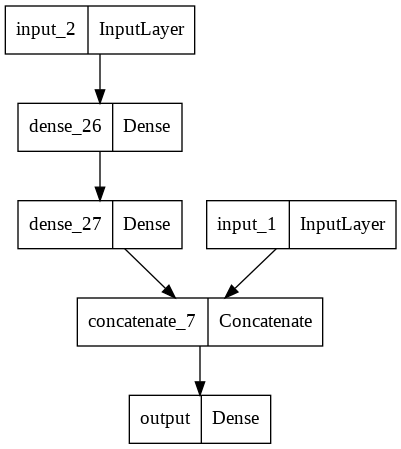

In [26]:
plot_model(model)

In [32]:
input_ = Input(shape=(10,10),name ='input_')
hidden1 = Dense(100, activation='relu')(input_)
hidden2= Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = Dense(1, name='sum_output')(hidden2)

model= Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_38 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_39 (Dense)               (None, 10, 10)       1010        ['dense_38[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_39[0][0]']               
                                                                                            

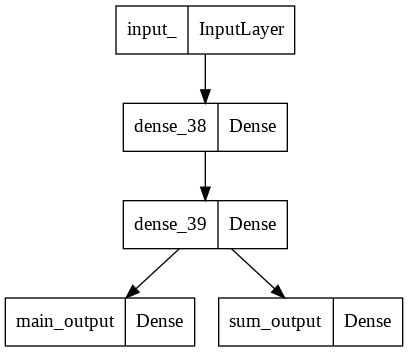

In [33]:
plot_model(model)

#서브클래싱
1.커스터마이징에 최적화된 방법

2.Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음

o fit(), evaluate(), predict()

o save(),load()

3.주로 call() 메소드안에서 원하는 계산 가능

o for,if 저수준 연산 등

4.권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때, 해석할 수 있어야함